In [6]:
import pandas as pd
import inventorize as inv
import seaborn as sns

In [3]:
df = pd.read_csv('twentyeleven.csv').drop_duplicates(ignore_index = True).dropna(axis = 0, how = 'any', subset = 'Description')
df_grouped = df.groupby(by = 'StockCode').agg(quantity = ('Quantity', 'sum'), revenue = ('revenue', 'sum')).reset_index()
df_grouped.head()

,StockCode,quantity,revenue
0,10002,609,525.48
1,10080,325,119.09
2,10120,176,36.96
3,10123C,4,2.60
4,10124A,12,5.04


In [4]:
abc_class = inv.productmix(df_grouped['StockCode'], df_grouped['quantity'], df_grouped['revenue'])
abc_class

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
3820,DOT,654,181577.580,1.282843e-04,0.923468,1.896367e-02,0.018964,B,A,B_A
1278,22423,11775,146461.780,2.309706e-03,0.206799,1.529623e-02,0.034260,A,A,A_A
2622,47566,18050,98237.490,3.540568e-03,0.102480,1.025977e-02,0.044520,A,A,A_A
3332,85123A,37892,94027.390,7.432643e-03,0.036883,9.820069e-03,0.054340,A,A,A_A
3314,85099B,46223,90140.660,9.066796e-03,0.029450,9.414146e-03,0.063754,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...
2871,84227,1,0.420,1.961534e-07,0.999992,4.386412e-08,1.000000,C,C,C_C
3822,PADS,4,0.003,7.846134e-07,0.999924,3.133152e-10,1.000000,C,C,C_C
2452,35600A,1,0.000,1.961534e-07,0.999998,0.000000e+00,1.000000,C,C,C_C
2376,23595,5,0.000,9.807668e-07,0.999864,0.000000e+00,1.000000,C,C,C_C


In [5]:
abc_class[['product_mix']].value_counts().reset_index()

,product_mix,count
0,C_C,1746
1,A_A,558
2,B_B,391
3,C_B,287
4,A_B,281
5,B_C,274
6,B_A,198
7,C_A,48
8,A_C,47


<Axes: xlabel='product_mix', ylabel='count'>

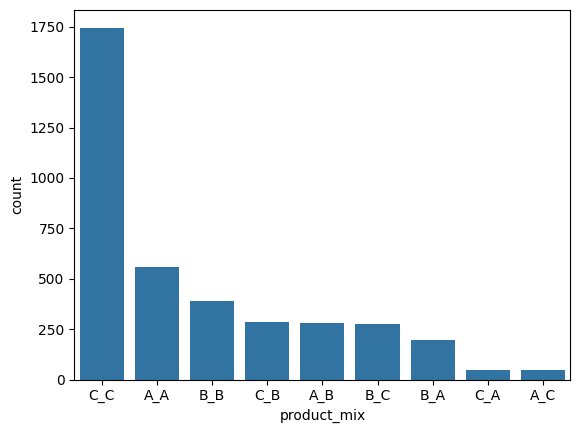

In [7]:
sns.barplot(data = abc_class[['product_mix']].value_counts().reset_index(), x = 'product_mix', y = 'count')

<Axes: xlabel='product_mix', ylabel='count'>

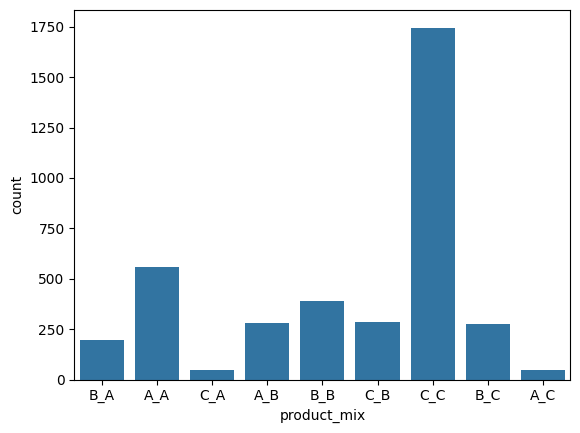

In [8]:
sns.countplot(data = abc_class, x = 'product_mix')

In [9]:
df_grouped_country = df.groupby(by = ['StockCode', 'Country']).agg(quantity = ('Quantity', 'sum'), revenue = ('revenue', 'sum')).reset_index()
df_grouped_country

,StockCode,Country,quantity,revenue
0,10002,France,276,234.60
1,10002,Germany,1,0.85
2,10002,Japan,1,0.85
3,10002,Spain,24,20.40
4,10002,Switzerland,12,10.20
...,...,...,...,...
19088,gift_0001_10,United Kingdom,9,74.97
19089,gift_0001_20,United Kingdom,20,167.05
19090,gift_0001_30,United Kingdom,7,175.53
19091,gift_0001_40,United Kingdom,2,66.66


In [11]:
abc_class_country = inv.productmix_storelevel(df_grouped_country['StockCode'], 
                                              df_grouped_country['quantity'], 
                                              df_grouped_country['revenue'], 
                                              df_grouped_country['Country'])

abc_class_country.head()

,sku,sales,revenue,storeofsku,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
19072,POST,774,14536.00,France,0.007229,0.178999,0.072670,0.072670,A,A,A_A
19053,M,7,9492.37,France,0.000065,0.989138,0.047455,0.120126,C,A,C_A
11997,23084,4024,7277.20,France,0.037582,0.037582,0.036381,0.156507,A,A,A_A
7042,22423,237,2791.35,France,0.002213,0.502452,0.013955,0.170462,A,A,A_A
3596,21731,1123,1852.95,France,0.010488,0.089985,0.009263,0.179725,A,A,A_A


In [12]:
abc_class_country[abc_class_country['storeofsku'] == 'EIRE']['product_mix'].value_counts()

product_mix
C_C    555
A_A    315
B_B    287
B_C    237
C_B    216
A_B    154
B_A    105
A_C     40
C_A     21
Name: count, dtype: int64

<Axes: xlabel='product_mix', ylabel='count'>

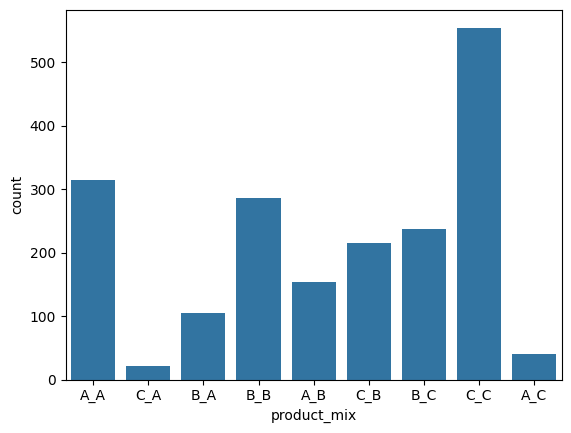

In [13]:
sns.countplot(data = abc_class_country[abc_class_country['storeofsku'] == 'EIRE'][['product_mix']], x = 'product_mix')